# TABLE OF CONTENT

1-Sentiment Analysis of Trendy Subjects on Twitter in U.S.

2-Importing the Data

3-Preprocessing

4-Data Wrangling

5-Modeling (Natural Language Processing)

     5a-Sentiment Analysis

     5b-Visualization
  
6-Findings

7-Conclusion

   # "Sentiment Analysis of Trendy Subjects on Twitter in US"

Twitter is one of the best indicators of the wider pulse of the world and what’s happening within it among the social media tools. In this era, people are exposing their thoughts, perspectives and ideas about a specific topic or subject via Twitter  mostly.

Smart companies are learning what’s required to extract the insights that are flowing  through the Tweets, sent every moment and it has been used as an important tool to  detect relevant trends, emotions of the public about those trends.

The ability to categorize opinions in the text of tweets-and specially to determine  whether the user’s attitude is positive, negative, or neutral-is highly valuable.  People are just a click away from getting huge chunk of information. With information comes people’s opinion and with this comes the positive, negative or neutral outlook of people regarding a topic. 

So in this project I will use a data set containing a collection of tweets about given-subjects to detect the sentiment associated with and detect the output as negative, neutral or positive accordingly using Machine Learning. 

Social media data is unstructured and needs to be cleaned before using it to train a sentiment analysis model-good quality data will lead to more accurate results.

Sentiment Analysis involves Natural Language Processing because it deals with  human-written text and a classification task which will classify people’s opinion expressed about different subjects chosen to be evaluated. Sentiment Analysis can help us decipher the mood and emotions of general public and gather insightful information regarding the context. Sentiment Analysis is a process of analyzing data and classifying it based on the need of the research.

The tweets on a specific time period, on a specific location, and on a specific subject  either an individual or anything will be the focus of this project. These tweets will  be classified by sentiment analysis and output of this analysis will be evaluated. 



__Importing the Data__

In the project, I will use Twitter data by connecting the Twitter API. I will retrieve 5000 tweets about the subject I will focus with the extended mode. All the tweets will be in English as language. This project will use Streaming API that allows to collect tweets on a real-time basis based on search terms, user ids or locations.

Twitter API stands for Application Programming Interface that makes interaction with computer programs and web services easy. This project will download tweets related to 5 keywords: "Covid", "stimulus", "Trump", "Biden", "vaccine". I intentionaly select these subjects because, these topics are the most popular keywords for last months and still they have more attractions than other issues in the thoughts of public.

In order to access Twitter Streaming API, we need to get 4 pieces of information from Twitter: API key, API secret, Access token and Access token secret.

I will be using a Python library called "Tweepy" to connect to Twitter API and download the data.

In [295]:
import tweepy
import json
from tweepy import StreamListener
import tweepy as tw
import pandas as pd
consumer_key=
consumer_secret=
access_token=
access_token_secret=
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)
results = []
for tweet in tweepy.Cursor (api.search, q = 'Trump -filter:retweets', lang = "en", tweet_mode='extended').items(5000): 
    results.append(tweet)
    
print (type(results))
print (len(results))

<class 'list'>
5000


# __Preprocessing__

The process of converting data to something a computer can understand is referred to as pre-processing. One of the major forms of pre-processing is to filter out useless data.

Here I parse the response from the twitter API into a structured table. The response from twitter streaming API’s is in the below format:

I run the codes and get the output. The data stored the relevant tweets in a dataframe which involves various variables, but in this project I will only extract the "full_text", "id" and "the date (created_at)" of the tweet. The data has extracted "full_text" because when using 'extended' mode, the text is replaced by "full_text" attribute. 

I found that some tweets have the exact same text but have been re-tweeted by different users. In order to extract a variety of hashtags from the tweets and to make the analysis unbiased, I decided to remove the duplicate tweets.

In [78]:
def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    data_set = pd.DataFrame(id_list, columns = ["id"])
    
    data_set["full_text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    
    return data_set
data_set = tweets_df(results)

NameError: name 'results' is not defined

In [297]:
text = data_set["full_text"]
for i in range(0,len(text)):
    txt = ' '.join(word for word in text[i] .split() if not word.startswith('https:'))
    data_set.at[i, 'text2'] = txt
    
data_set.drop_duplicates('text2', inplace=True)
data_set.reset_index(drop = True, inplace=True)
data_set.drop('full_text', axis = 1, inplace = True)
data_set.rename(columns={'text2': 'full_text'}, inplace=True)

# __Data Wrangling__

This project will look at the full_text of the data which involves special characters and punctuations. In Sentiment analysis, understanding and being able to use regular expressions is a prerequisite for doing any task. You can remove URLs (links) using regular expressions accessed from the "re" package which stands for "regular expressions". 

Below codes will remove special characters other than alphanumerics and replace it with nothing. "re.sub" allows to substitute a selection of characters defined using a regular expression, with something else.

Capitalization is also a challenge when analyzing text data. If you are trying to create a list of unique words in your tweets, words with capitalization will be different from words that are all lowercase. To account for this, I made each word lowercase using the string method ".lower()"

In [298]:
import re
    #print(re.sub(r"[^a-zA-Z0-9]+", ' ', k))
f = lambda x: re.sub(r"[^a-zA-Z.,!?/:;\"\'\s]+", ' ', x)
data_set['full_text'] = data_set['full_text'].apply(f)

In [299]:
f = lambda x: x.lower()
data_set['full_text'] = data_set['full_text'].apply(f)

# Modeling (Sentiment Analysis)


People express their opinions via tweets and these usually have sentiment associated with it i.e. positive, negative or neutral. This project will use sentiment analysis classification technique where mainly focus on the detection of sentiments in the "full_text". In the training process (a), our model learns to associate a particular input ("full_text) to the corresponding output (tag) based on the "full_test" samples used for training. The feature extractor transfers the text input into a feature vector. Pairs of feature vectors and tags (e.g. positive, negative, or neutral) are fed into the machine learning algorithm to generate a model.

In the prediction process (b), the feature extractor is used to transform unseen "full_text" inputs into feature vectors. These feature vectors are then fed into the model, which generates predicted tags (again, positive, negative, or neutral).

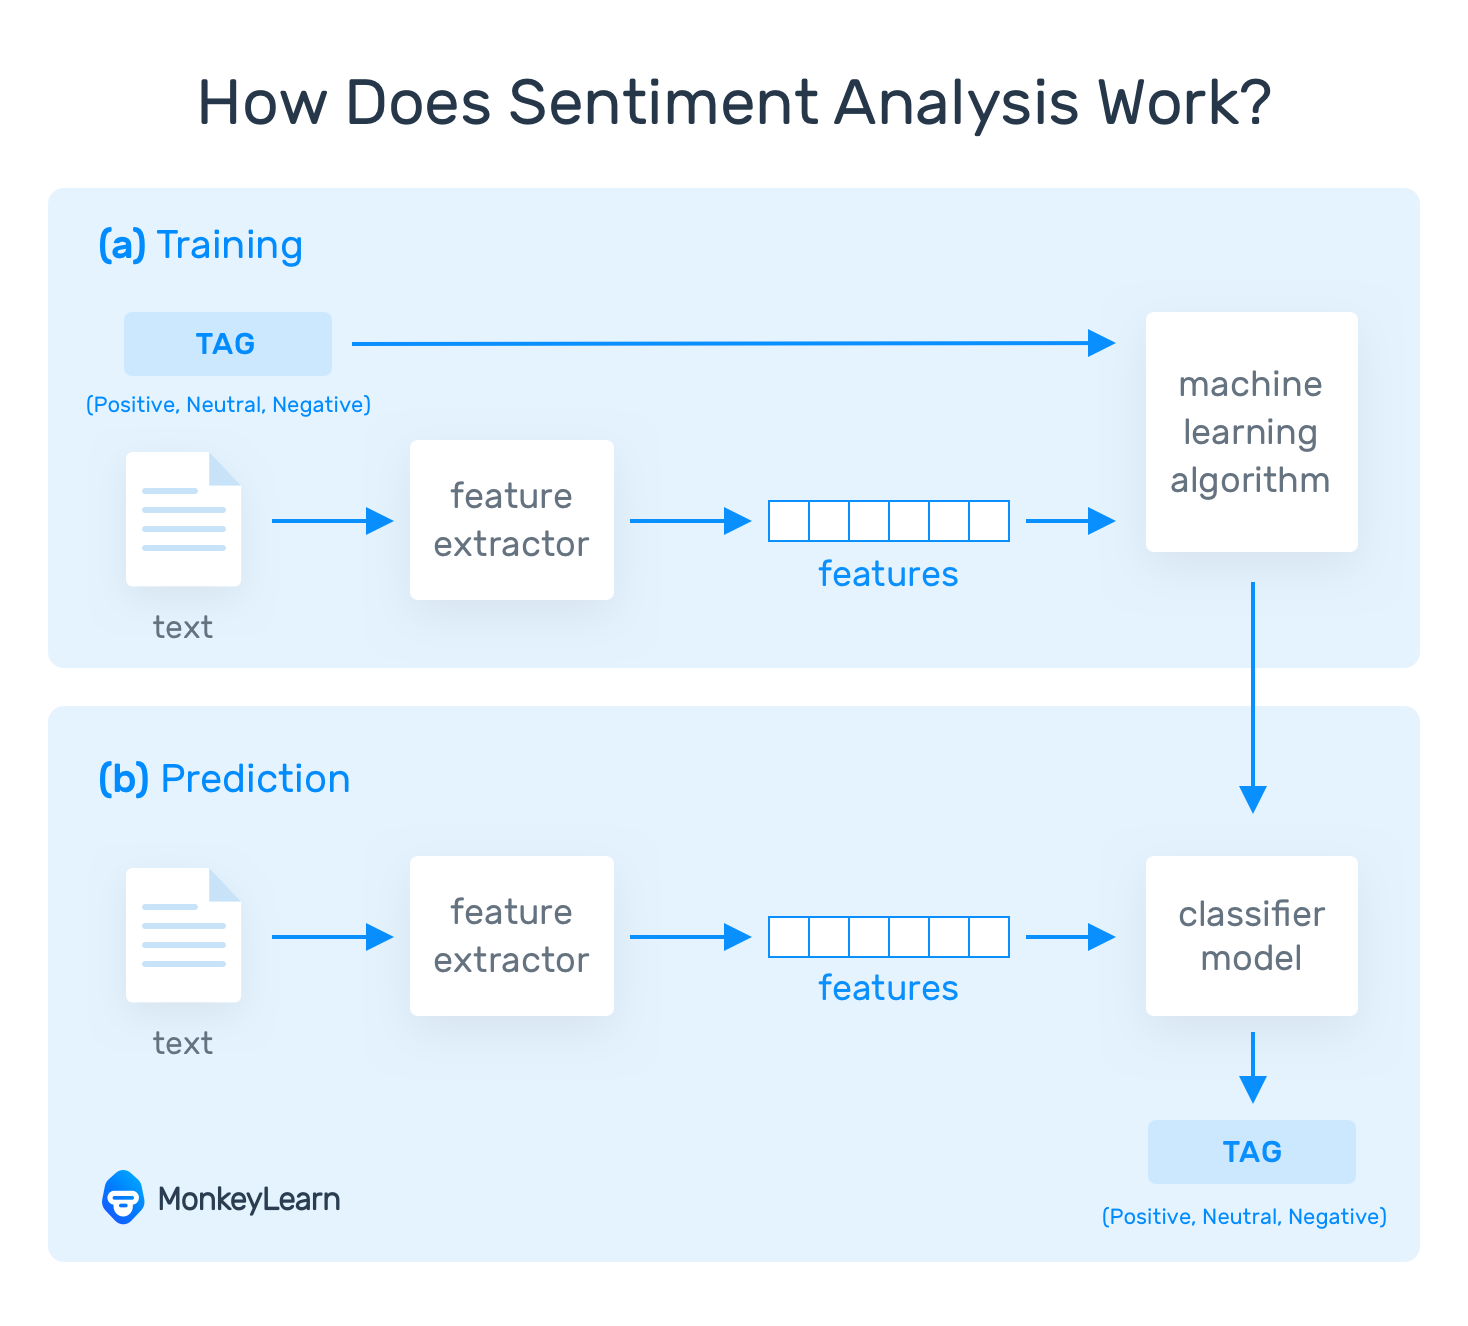

Python has an inbuilt library (TextBlob) to do this. TextBlob is a python library for Natural Language Processing (NLP). TextBlob is a simple library which supports complex analysis and operations on textual data.

Sentiment of the each tweet will consist of 3 (three) range:

if sentiment < 0.00, this will correspond to negative

if sentiment = 0.00, this will correspond to neutral

if sentiment > 0.00, this will correspond to positive.








In [ ]:
from textblob import TextBlob
text = data_set["full_text"]

for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    data_set.at[i, 'Sentiment'] = sentiment
    if sentiment <0.00:
        SentimentClass = 'Negative'
        data_set.at[i, 'SentimentClass'] = SentimentClass 
    elif sentiment >0.00:
        SentimentClass = 'Positive'
        data_set.at[i, 'SentimentClass'] = SentimentClass 
    else:
        SentimentClass = 'Neutral'
        data_set.at[i, 'SentimentClass'] = SentimentClass 

After making the sentiment analysis, I will save the output as a csv file. Until this step, I applied the same codes and NLP Sentiment Analysis model to each subject. I saved each output data as a seperate file to run them seperately.

I will start with the analysis of Tweets about Trump:

In [ ]:
tweet = data_set.to_csv("/Users/bahtinur/Desktop/Tweet/Trump.csv")

I will read the file and reveal the output.

In [79]:
import pandas as pd

tweet_Trump = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/Trump.csv"), index_col=0)

In [80]:
tweet_Trump.head()

,id,created_at,full_text,Sentiment,SentimentClass,StopWords,Stemming,Lemmatizing
0,1330756653721948162,2020-11-23 06:14:45,"excitedamerica msnbc you are correct, the st...",0.100000,Positive,"excitedamerica msnbc correct, states elections...","excitedamerica msnbc correct, state elections,...","excitedamerica msnbc correct, state elections,..."
1,1330756652631433218,2020-11-23 06:14:44,realdonaldtrump at a saturday session on inte...,-0.100000,Negative,realdonaldtrump saturday session international...,realdonaldtrump saturday session intern vaccin...,realdonaldtrump saturday session intern vaccin...
2,1330756651910094849,2020-11-23 06:14:44,jeepmtn matthew trump there is integrity in ...,0.233333,Positive,jeepmtn matthew trump integrity election proce...,jeepmtn matthew trump integr elect process. th...,jeepmtn matthew trump integr elect process. th...
3,1330756650827911171,2020-11-23 06:14:44,"meidas kelly seems kinda cheap for trump, i d...",0.400000,Positive,"meidas kelly seems kinda cheap trump, think want","meida kelli seem kinda cheap trump, think want","meida kelli seem kinda cheap trump, think want"
4,1330756650584530944,2020-11-23 06:14:44,brianinmississ steb hoping trump his gang...,0.190000,Positive,brianinmississ steb hoping trump gang somehow ...,brianinmississ steb hope trump gang somehow ma...,brianinmississ steb hope trump gang somehow ma...


# Step 1) Removal of Stop Words (Cleaning)

Stopwords are often added to sentences to make them grammatically correct, for example, words such as a, is, an, the, and etc. These stopwords carry minimal to no importance and are available plenty on open texts, articles, comments etc. These should be removed so machine learning algorithms can better focus on words which define the meaning/idea of the text. I am using list from nltk.corpus and this list can further be enhanced by adding or removing custom words based on the situation at hand.

In [77]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = stopwords.words("english")

print((tweet_Trump['full_text']).head())
print('-------Remove Stop Word------')
tweet_Trump['StopWords'] = tweet_Trump['full_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print((tweet_Trump['StopWords']).head())

0     excitedamerica  msnbc you are correct, the st...
1     realdonaldtrump at a saturday session on inte...
2     jeepmtn  matthew trump there is integrity in ...
3     meidas kelly seems kinda cheap for trump, i d...
4     brianinmississ  steb  hoping trump   his gang...
Name: full_text, dtype: object
-------Remove Stop Word------
0    excitedamerica msnbc correct, states elections...
1    realdonaldtrump saturday session international...
2    jeepmtn matthew trump integrity election proce...
3     meidas kelly seems kinda cheap trump, think want
4    brianinmississ steb hoping trump gang somehow ...
Name: StopWords, dtype: object


# Step 2) Stemming

Stemming is the process of reducing inflected/derived words to their word stem, base or root form. The stem need not be identical to original word. There are many ways to perform stemming such as lookup table, suffix-stripping algorithms etc. These mainly rely on chopping-off ‘s’, ‘es’, ‘ed’, ‘ing’, ‘ly’ etc from the end of the words and sometimes the conversion is not desirable. But nonetheless, stemming helps us in standardizing text.

In [3]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print((tweet_Trump['StopWords']).head())
print('-------Stemming------')
tweet_Trump['Stemming'] = tweet_Trump['StopWords'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
print((tweet_Trump['Stemming']).head())

0    excitedamerica msnbc correct, states elections...
1    realdonaldtrump saturday session international...
2    jeepmtn matthew trump integrity election proce...
3     meidas kelly seems kinda cheap trump, think want
4    brianinmississ steb hoping trump gang somehow ...
Name: StopWords, dtype: object
-------Stemming------
0    excitedamerica msnbc correct, state elections,...
1    realdonaldtrump saturday session intern vaccin...
2    jeepmtn matthew trump integr elect process. th...
3       meida kelli seem kinda cheap trump, think want
4    brianinmississ steb hope trump gang somehow ma...
Name: Stemming, dtype: object


# Step 3) Lemmatization

Though stemming and lemmatization both generate the root form of inflected/desired words, but lemmatization is an advanced form of stemming. Stemming might not result in actual word, whereas lemmatization does conversion properly with the use of vocabulary, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

In [4]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print((tweet_Trump['Stemming']).head())
print('-------Lemmazation------')
tweet_Trump['Lemmatizing'] = tweet_Trump['Stemming'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
print((tweet_Trump['Lemmatizing']).head())

0    excitedamerica msnbc correct, state elections,...
1    realdonaldtrump saturday session intern vaccin...
2    jeepmtn matthew trump integr elect process. th...
3       meida kelli seem kinda cheap trump, think want
4    brianinmississ steb hope trump gang somehow ma...
Name: Stemming, dtype: object
-------Lemmazation------
0    excitedamerica msnbc correct, state elections,...
1    realdonaldtrump saturday session intern vaccin...
2    jeepmtn matthew trump integr elect process. th...
3       meida kelli seem kinda cheap trump, think want
4    brianinmississ steb hope trump gang somehow ma...
Name: Lemmatizing, dtype: object


# Sentiment of Lemmatized Data

In [5]:
from textblob import TextBlob
text = tweet_Trump["Lemmatizing"]

for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    tweet_Trump.at[i, 'Sentiment'] = sentiment
    if sentiment <0.00:
        SentimentClass = 'Negative'
        tweet_Trump.at[i, 'SentimentClass'] = SentimentClass 
    elif sentiment >0.00:
        SentimentClass = 'Positive'
        tweet_Trump.at[i, 'SentimentClass'] = SentimentClass 
    else:
        SentimentClass = 'Neutral'
        tweet_Trump.at[i, 'SentimentClass'] = SentimentClass 

In [5]:
tweet = tweet_Trump.to_csv("/Users/bahtinur/Desktop/Tweet/Trump.csv")

In [82]:
import pandas as pd

tweet_Trump = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/Trump.csv"), index_col=0)

# Dropping Irrelevant Columns

In [83]:
tweet_Trump.drop(['StopWords', 'Stemming', 'full_text'], axis=1, inplace = True)

tweet_Trump.head()

,id,created_at,Sentiment,SentimentClass,Lemmatizing
0,1330756653721948162,2020-11-23 06:14:45,0.100000,Positive,"excitedamerica msnbc correct, state elections,..."
1,1330756652631433218,2020-11-23 06:14:44,-0.100000,Negative,realdonaldtrump saturday session intern vaccin...
2,1330756651910094849,2020-11-23 06:14:44,0.233333,Positive,jeepmtn matthew trump integr elect process. th...
3,1330756650827911171,2020-11-23 06:14:44,0.400000,Positive,"meida kelli seem kinda cheap trump, think want"
4,1330756650584530944,2020-11-23 06:14:44,0.190000,Positive,brianinmississ steb hope trump gang somehow ma...


In [84]:
sent = {'Positive':'1','Negative':'2','Neutral':'0'}
tweet_Trump['SentimentClass'] = tweet_Trump['SentimentClass'].map(sent)

In [85]:
tweet_Trump.head()

,id,created_at,Sentiment,SentimentClass,Lemmatizing
0,1330756653721948162,2020-11-23 06:14:45,0.100000,1,"excitedamerica msnbc correct, state elections,..."
1,1330756652631433218,2020-11-23 06:14:44,-0.100000,2,realdonaldtrump saturday session intern vaccin...
2,1330756651910094849,2020-11-23 06:14:44,0.233333,1,jeepmtn matthew trump integr elect process. th...
3,1330756650827911171,2020-11-23 06:14:44,0.400000,1,"meida kelli seem kinda cheap trump, think want"
4,1330756650584530944,2020-11-23 06:14:44,0.190000,1,brianinmississ steb hope trump gang somehow ma...


In [86]:
tweet_Trump.rename(columns={'Lemmatizing':'text'}, inplace=True)


In [87]:
tweet_Trump.head()

,id,created_at,Sentiment,SentimentClass,text
0,1330756653721948162,2020-11-23 06:14:45,0.100000,1,"excitedamerica msnbc correct, state elections,..."
1,1330756652631433218,2020-11-23 06:14:44,-0.100000,2,realdonaldtrump saturday session intern vaccin...
2,1330756651910094849,2020-11-23 06:14:44,0.233333,1,jeepmtn matthew trump integr elect process. th...
3,1330756650827911171,2020-11-23 06:14:44,0.400000,1,"meida kelli seem kinda cheap trump, think want"
4,1330756650584530944,2020-11-23 06:14:44,0.190000,1,brianinmississ steb hope trump gang somehow ma...


In [88]:
tweet_Trump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 0 to 4892
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4893 non-null   int64  
 1   created_at      4893 non-null   object 
 2   Sentiment       4893 non-null   float64
 3   SentimentClass  4893 non-null   object 
 4   text            4893 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 229.4+ KB


In [93]:
sent = {'1':'Positive','2':'Negative','0':'Neutral'}
tweet_Trump['SentimentClass'] = tweet_Trump['SentimentClass'].map(sent)
tweet_Trump['SentimentClass'].value_counts()

Positive    1922
Neutral     1879
Negative    1092
Name: SentimentClass, dtype: int64

<AxesSubplot:>

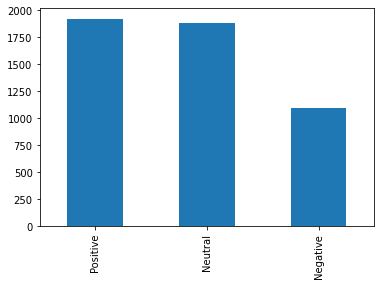

In [94]:
import matplotlib.pyplot as plt
tweet_Trump['SentimentClass'].value_counts().plot(kind='bar', width=0.5)

# Let's divide our dataset into feature and label sets.

Our feature set will consist of tweets only. If we look at our dataset, the 5th column contains the tweet text. Note that the index of the column will be 4 since pandas columns follow zero-based indexing scheme where the first column is called 0th column. Our label set will consist of the SentimentClass of the tweet that we have to predict. The SentimentClass of the tweet is in the 4th column (index 3). To create a feature and a label set, we can use the iloc method off the pandas data frame.

In [91]:
X = tweet_Trump.iloc[:, 4].values
y = tweet_Trump.iloc[:, 3].values

# Representing Text in Numeric Form

Statistical algorithms use mathematics to train machine learning models. However, mathematics only work with numbers. To make statistical algorithms work with text, we first have to convert text to numbers.

In our project, we will use TF-IDF for vectorization. The idea behind the TF-IDF approach is that the words that occur less in all the documents and more in individual document contribute more towards classification.

Python's Scikit-Learn library contains the TfidfVectorizer class that can be used to convert text features into TF-IDF feature vectors. The following script performs this:

In [92]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=250, min_df=7, max_df=0.8)
X = vectorizer.fit_transform(X).toarray()

In the code above, we define that the max_features should be 250, which means that it only uses the 250 most frequently occurring words to create a bag of words feature vector. Words that occur less frequently are not very useful for classification.

Similarly, max_df specifies that only use those words that occur in a maximum of 80% of the documents. Words that occur in all documents are too common and are not very useful for classification. Similarly, min-df is set to 7 which shows that include words that occur in at least 7 documents.

# Dividing Data into Training and Test Sets

In the previous section, we converted the data into the numeric form. As the last step before we train our algorithms, we need to divide our data into training and testing sets. The training set will be used to train the algorithm while the test set will be used to evaluate the performance of the machine learning model.

Execute the following code:

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In the code above we use the train_test_split class from the sklearn.model_selection module to divide our data into training and testing set. The method takes the feature set as the first parameter, the label set as the second parameter, and a value for the test_size parameter. We specified a value of 0.1 for test_size which means that our data set will be split into two sets of 90% and 10% data. We will use the 90% dataset for training and 10% dataset for testing.

In [58]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4893, 250), (4893,), (4403, 250), (4403,), (490, 250), (490,))

# Training the Model

Once data is split into training and test set, machine learning algorithms can be used to learn from the training data. You can use any machine learning algorithm. However, we will use the Random Forest algorithm, owing to its ability to act upon non-normalized data.

The sklearn.ensemble module contains the RandomForestClassifier class that can be used to train the machine learning model using the random forest algorithm. To do so, we need to call the fit method on the RandomForestClassifier class and pass it our training features and labels, as parameters. Look at the following script:

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=0)
rfc.fit(X_train, y_train)
y_predRF = rfc.predict(X_test)
score_RF = rfc.score(X_test, y_test)

# Making Predictions and Evaluating the Model

Once the model has been trained, the last step is to make predictions on the model. To do so, we need to call the predict method on the object of the RandomForestClassifier class that we used for training. 
Look at the above script.

Finally, to evaluate the performance of the machine learning models, we can use classification metrics such as a confusion metrix, F1 measure, accuracy, etc.

To find the values for these metrics, we can use classification_report, confusion_matrix, and accuracy_score utilities from the sklearn.metrics library. Look a the following script:

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_predRF))
print(classification_report(y_test,y_predRF))
print(accuracy_score(y_test, y_predRF))

[[166   9   8]
 [ 30 159   8]
 [ 55  18  37]]
              precision    recall  f1-score   support

           0       0.66      0.91      0.76       183
           1       0.85      0.81      0.83       197
           2       0.70      0.34      0.45       110

    accuracy                           0.74       490
   macro avg       0.74      0.68      0.68       490
weighted avg       0.75      0.74      0.72       490

0.7387755102040816


From the output, you can see that our algorithm achieved an accuracy of 74%.



I am also going to run different Machine Learning Classification Models such as Support Vector Machine, KNN, Logistic Regression and Naive Bayes in the same way I follow in Random Forest Classifier.

In [62]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_predSVC = svclassifier.predict(X_test)
score_SVC = svclassifier.score(X_test, y_test)

In [63]:
print(confusion_matrix(y_test,y_predSVC))
print(classification_report(y_test,y_predSVC))
print(accuracy_score(y_test, y_predSVC))

[[179   1   3]
 [ 36 149  12]
 [ 61  13  36]]
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       183
           1       0.91      0.76      0.83       197
           2       0.71      0.33      0.45       110

    accuracy                           0.74       490
   macro avg       0.76      0.69      0.68       490
weighted avg       0.77      0.74      0.72       490

0.7428571428571429


In [64]:
y_predSVC[0:10]

array(['1', '1', '0', '0', '0', '0', '0', '1', '0', '0'], dtype=object)

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predNB = NB_model.predict(X_test)
score_NB = NB_model.score(X_test, y_test)
print(confusion_matrix(y_test,y_predNB))
print(classification_report(y_test,y_predNB))
print(accuracy_score(y_test, y_predNB))

[[147  32   4]
 [ 35 155   7]
 [ 55  29  26]]
              precision    recall  f1-score   support

           0       0.62      0.80      0.70       183
           1       0.72      0.79      0.75       197
           2       0.70      0.24      0.35       110

    accuracy                           0.67       490
   macro avg       0.68      0.61      0.60       490
weighted avg       0.68      0.67      0.64       490

0.6693877551020408


In [66]:
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)
y_predLR = LR_model.predict(X_test)
score_LR = LR_model.score(X_test, y_test)
print(confusion_matrix(y_test,y_predLR))
print(classification_report(y_test,y_predLR))
print(accuracy_score(y_test, y_predLR))

[[168   7   8]
 [ 27 153  17]
 [ 54  19  37]]
              precision    recall  f1-score   support

           0       0.67      0.92      0.78       183
           1       0.85      0.78      0.81       197
           2       0.60      0.34      0.43       110

    accuracy                           0.73       490
   macro avg       0.71      0.68      0.67       490
weighted avg       0.73      0.73      0.71       490

0.7306122448979592


In [74]:
from sklearn.neighbors import KNeighborsClassifier #K nearest neighbors
model_KNN = KNeighborsClassifier(n_neighbors=4)
model_KNN.fit(X_train, y_train)
y_predKNN = model_KNN.predict(X_test)
score_KNN = model_KNN.score(X_test,y_test)

print(confusion_matrix(y_test,y_predKNN))
print(classification_report(y_test,y_predKNN))
print(accuracy_score(y_test, y_predKNN))


[[166  11   6]
 [124  58  15]
 [ 83  10  17]]
              precision    recall  f1-score   support

           0       0.45      0.91      0.60       183
           1       0.73      0.29      0.42       197
           2       0.45      0.15      0.23       110

    accuracy                           0.49       490
   macro avg       0.54      0.45      0.42       490
weighted avg       0.56      0.49      0.44       490

0.49183673469387756


In [75]:
from texttable import Texttable
# texttable takes the first reocrd in the list as the column names
# of the table
l = [["CLASSIFICATION", "ACCURACY"],['LogisticRegression', score_LR],['RandomForest', score_RF],['K-NearestNeighbors',score_KNN],['MultinominalNaiveBayes',score_NB], ['SupportVector', score_SVC]]
table = Texttable()
table.add_rows(l)
print(table.draw())

+------------------------+----------+
|     CLASSIFICATION     | ACCURACY |
+========================+==========+
| LogisticRegression     | 0.731    |
+------------------------+----------+
| RandomForest           | 0.739    |
+------------------------+----------+
| K-NearestNeighbors     | 0.492    |
+------------------------+----------+
| MultinominalNaiveBayes | 0.669    |
+------------------------+----------+
| SupportVector          | 0.743    |
+------------------------+----------+


The Above table reveals that Among the 5 Classifier Models, the highest accuracy belongs to Support Vector Machine where the lowest accuracy is in KNN model.

The first 5 rows of the dataset related to Trump tweets.

In [304]:
tweet_Trump.head()

,id,created_at,full_text,Sentiment,SentimentClass
0,1330756653721948162,2020-11-23 06:14:45,"excitedamerica msnbc you are correct, the st...",5.00%,Positive
1,1330756652631433218,2020-11-23 06:14:44,realdonaldtrump at a saturday session on inte...,-6.67%,Negative
2,1330756651910094849,2020-11-23 06:14:44,jeepmtn matthew trump there is integrity in ...,-5.00%,Negative
3,1330756650827911171,2020-11-23 06:14:44,"meidas kelly seems kinda cheap for trump, i d...",45.00%,Positive
4,1330756650584530944,2020-11-23 06:14:44,brianinmississ steb hoping trump his gang...,12.67%,Positive


In the dataset of the tweets those have subject of "Trump", has 4893 non-null entries and all of them are object type.

In [309]:
tweet_Trump['SentimentClass'].value_counts()

Positive    2095
Neutral     1465
Negative    1333
Name: SentimentClass, dtype: int64

When we reveal the counts of the each sentiment class, the positive tweets about Trump are the highest when we compare with other two classes. 

In [310]:
tweet_Trump['SentimentClass'].value_counts()/len(tweet_Covid) * 100

Positive    42.737658
Neutral     29.885761
Negative    27.192982
Name: SentimentClass, dtype: float64

The count of the each sentiment class, the dataset reveals that almost %43 of the tweets used "Trump" as subject are positive that reveals that users of these tweets have positive perspective on President Trump. %42 of these tweets were positive, %29 are neutral and %27 of the tweets have negative perspective.

We can also look at the highest and lowest size tweets about Trump.

In [ ]:
length_text = tweet_Trump['full_text'].str.len()

In [312]:
max(length_text)

756

In [313]:
min(length_text)

5

Here is the visualization of the tweet about Trump which reveals that the count of negative and neutral tweets are almost same and positive ones have the highest number of counts.

<AxesSubplot:>

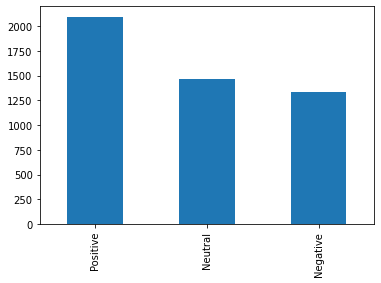

In [314]:
import matplotlib.pyplot as plt
tweet_Trump['SentimentClass'].value_counts().plot(kind='bar', width=0.5)

It is time to look at the 2nd subject of this project which will be the rival of the President Trump during the election: "Biden". 

As I mentioned above, I retrieved the tweets about Biden with using Twitter API and save it as a csv file.

In [55]:
tweet_Biden = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/Biden.csv"), index_col=0)

In [56]:
tweet_Biden['Sentiment'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tweet_Biden['Sentiment']], index = tweet_Biden.index)

In [57]:
tweet_Biden.head()

,id,created_at,full_text,Sentiment,SentimentClass
0,1330752855066763264,2020-11-23 05:59:39,"whitehouse how about u post a plan cv , don...",25.00%,Positive
1,1330752854072692736,2020-11-23 05:59:39,biden and harris will have a hard time getting...,25.42%,Positive
2,1330752853913128960,2020-11-23 05:59:39,joenbc jonlemire with not a shred of evidenc...,0.00%,Neutral
3,1330752851543470081,2020-11-23 05:59:38,blinken was a key adviser to biden when the s...,0.00%,Neutral
4,1330752850889203719,2020-11-23 05:59:38,snl got jim carrey to okay biden because he is...,-15.00%,Negative


I followed the same process as I did in the previous subject during the data wrangling process.

In [58]:
del tweet_Biden['id']

In [59]:
tweet_Biden.rename(columns={'created_at':'date'}, inplace=True)


In [60]:
tweet_Biden.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4862 entries, 0 to 4861
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            4862 non-null   object
 1   full_text       4861 non-null   object
 2   Sentiment       4862 non-null   object
 3   SentimentClass  4862 non-null   object
dtypes: object(4)
memory usage: 189.9+ KB


When I checked the counts of the each column, I realized that the column "full_text" has an NaN value and it has to be dropped.

In [67]:
tweet_Biden[tweet_Biden.isna().any(axis=1)]
tweet_Biden = tweet_Biden.dropna(how='any')

In [68]:
tweet_Biden.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4861 entries, 0 to 4861
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            4861 non-null   object
 1   full_text       4861 non-null   object
 2   Sentiment       4861 non-null   object
 3   SentimentClass  4861 non-null   object
dtypes: object(4)
memory usage: 189.9+ KB


In [69]:
tweet_Biden['SentimentClass'].value_counts()

Neutral     2051
Positive    1881
Negative     929
Name: SentimentClass, dtype: int64

In [70]:
tweet_Biden['SentimentClass'].value_counts()/len(tweet_Biden) * 100

Neutral     42.192964
Positive    38.695742
Negative    19.111294
Name: SentimentClass, dtype: float64

The count of the each sentiment class, the dataset reveals that almost %42 of the tweets used "Biden" as subject are neutral that reveals that users of these tweets have neutral perspective on President-elect Biden. %39 of these tweets were positive, %19 of the tweets have negative perspective. We can understand that, most of the tweets about Biden have neutral and positive emotion.

In [346]:
length_text = tweet_Biden['full_text'].str.len()

In [347]:
max(length_text)

140.0

In [348]:
min(length_text)

7.0

<AxesSubplot:>

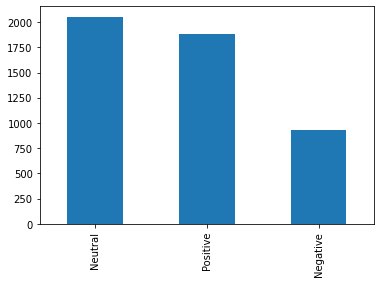

In [349]:
import matplotlib.pyplot as plt
tweet_Biden['SentimentClass'].value_counts().plot(kind='bar', width=0.5)

In [14]:
tweet_Covid = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/Covid.csv"), index_col=0)

In [15]:
tweet_Covid['Sentiment'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tweet_Covid['Sentiment']], index = tweet_Covid.index)

In [16]:
tweet_Covid.head()

,id,created_at,full_text,Sentiment,SentimentClass
0,1330567120091025412,2020-11-22 17:41:36,hairymarx keithwmacdonal maajidnawaz lbc...,-60.00%,Negative
1,1330567119264681985,2020-11-22 17:41:36,anti vaxxers think that if they don t get the ...,45.62%,Positive
2,1330567118765506560,2020-11-22 17:41:36,joncoopertweets i ve said all along if it s d...,0.00%,Neutral
3,1330567113078169606,2020-11-22 17:41:35,lkgwin mmpadellan will that trigger drumoft?...,50.00%,Positive
4,1330567108707676162,2020-11-22 17:41:34,government exploring modalities of emergency a...,0.00%,Neutral


In [17]:
del tweet_Covid['id']
tweet_Covid.rename(columns={'created_at':'date'}, inplace=True)

In [18]:
tweet_Covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 0 to 4812
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            4813 non-null   object
 1   full_text       4813 non-null   object
 2   Sentiment       4813 non-null   object
 3   SentimentClass  4813 non-null   object
dtypes: object(4)
memory usage: 188.0+ KB


In [19]:
tweet_Covid['SentimentClass'].value_counts()

Positive    2403
Neutral     1350
Negative    1060
Name: SentimentClass, dtype: int64

In [20]:
tweet_Covid['SentimentClass'].value_counts()/len(tweet_Covid) * 100

Positive    49.927280
Neutral     28.049034
Negative    22.023686
Name: SentimentClass, dtype: float64

When I look at the count of the each sentiment class, the dataset reveals that half of the tweets used "Covid" as subject are positive that reveals that users of these tweets have positive perspective on Covid pandamic. %50 of these tweets were positive, %28 are neutral and %22 of the tweets have negative emotion.

In [21]:
tweet_Covid['SentimentClass'].value_counts()/len(tweet_Covid) * 100

Positive    49.927280
Neutral     28.049034
Negative    22.023686
Name: SentimentClass, dtype: float64

In [22]:
length_text = tweet_Covid['full_text'].str.len()

In [23]:
max(length_text)

908

In [24]:
min(length_text)

4

<AxesSubplot:>

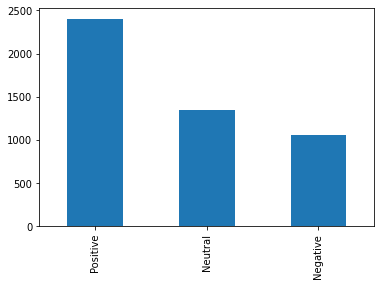

In [25]:
import matplotlib.pyplot as plt
tweet_Covid['SentimentClass'].value_counts().plot(kind='bar', width=0.5)

In [26]:
import tweepy
import json
from tweepy import StreamListener
import tweepy as tw
import pandas as pd

In [27]:
tweet_stimulus = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/stimulus.csv"), index_col=0)

In [28]:
tweet_stimulus['Sentiment'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tweet_stimulus['Sentiment']], index = tweet_stimulus.index)

In [29]:
tweet_stimulus.head()

,id,created_at,full_text,Sentiment,SentimentClass
0,1330775252339572737,2020-11-23 07:28:39,pandemic stimulus: cancel student loans by exe...,0.00%,Neutral
1,1330775251664429061,2020-11-23 07:28:39,repmichaelwaltz senrickscott spaceforcedod ...,0.00%,Neutral
2,1330775152179752964,2020-11-23 07:28:15,senrickscott america stimulus now . mil...,6.82%,Positive
3,1330775041685020672,2020-11-23 07:27:49,markets move higher as investors eye the ele...,25.00%,Positive
4,1330775013746733057,2020-11-23 07:27:42,"aerosol may not be good for the environment, b...",60.00%,Positive


In [30]:
del tweet_stimulus['id']
tweet_stimulus.rename(columns={'created_at':'date'}, inplace=True)

In [31]:
tweet_stimulus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4690 entries, 0 to 4689
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            4690 non-null   object
 1   full_text       4690 non-null   object
 2   Sentiment       4690 non-null   object
 3   SentimentClass  4690 non-null   object
dtypes: object(4)
memory usage: 183.2+ KB


In [32]:
tweet_stimulus['SentimentClass'].value_counts()

Neutral     2103
Positive    1723
Negative     864
Name: SentimentClass, dtype: int64

The count of the each sentiment class, the dataset reveals that almost %45 of the tweets used "stimulus" as subject are neutral that reveals that users of these tweets have neutral perspective on stimulus relief package. %38 of these tweets were positive, %18 of the tweets have negative perspective. We can understand that, most of the tweets about stimulus have neutral and positive emotion.

In [33]:
tweet_stimulus['SentimentClass'].value_counts()/len(tweet_stimulus) * 100

Neutral     44.840085
Positive    36.737740
Negative    18.422175
Name: SentimentClass, dtype: float64

In [37]:
length_text = tweet_stimulus['full_text'].str.len()

In [38]:
max(length_text)

143

In [39]:
min(length_text)

12

<AxesSubplot:>

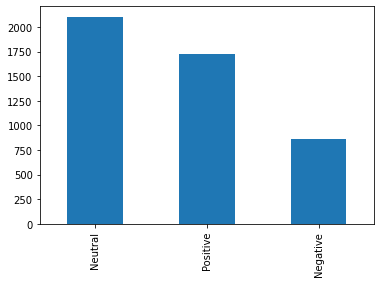

In [40]:
import matplotlib.pyplot as plt
tweet_stimulus['SentimentClass'].value_counts().plot(kind='bar', width=0.5)

In [41]:
tweet_vaccine = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/vaccine.csv"), index_col=0)

In [42]:
tweet_vaccine['Sentiment'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tweet_vaccine['Sentiment']], index = tweet_vaccine.index)

In [43]:
tweet_vaccine.head()

,id,created_at,full_text,Sentiment,SentimentClass
0,1330833397120454656,2020-11-23 11:19:42,oxford uni newsletter confirms the key princip...,-20.00%,Negative
1,1330833393026621441,2020-11-23 11:19:41,kaarnama vinayak jain bcoz vaccine isafe by...,0.00%,Neutral
2,1330833388987699201,2020-11-23 11:19:40,kieranmurphy lilyallen yes it is. this is t...,13.64%,Positive
3,1330833387469332485,2020-11-23 11:19:39,lynnehall uniofoxford is enough to protect...,10.00%,Positive
4,1330833386185908225,2020-11-23 11:19:39,"cjhancock ah, vaccine peak. one standout sess...",0.00%,Neutral


In [44]:
tweet_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4670 entries, 0 to 4669
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              4670 non-null   int64 
 1   created_at      4670 non-null   object
 2   full_text       4670 non-null   object
 3   Sentiment       4670 non-null   object
 4   SentimentClass  4670 non-null   object
dtypes: int64(1), object(4)
memory usage: 218.9+ KB


In [45]:
tweet_vaccine['SentimentClass'].value_counts()

Positive    2139
Neutral     1867
Negative     664
Name: SentimentClass, dtype: int64

The count of the each sentiment class, the dataset reveals that almost %46 of the tweets used "vaccine" as subject are positive that reveals that users of these tweets have positive perspective on vaccine about Covid-19. %40 of these tweets were neutral, %15 of the tweets have negative perspective. We can understand that, most of the tweets about vaccine have neutral and positive emotion.

In [46]:
tweet_vaccine['SentimentClass'].value_counts()/len(tweet_vaccine) * 100

Positive    45.802998
Neutral     39.978587
Negative    14.218415
Name: SentimentClass, dtype: float64

In [47]:
length_text = tweet_vaccine['full_text'].str.len()

In [48]:
max(length_text)

140

In [49]:
min(length_text)

7

<AxesSubplot:>

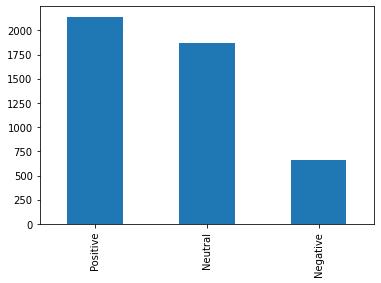

In [50]:
import matplotlib.pyplot as plt
tweet_vaccine['SentimentClass'].value_counts().plot(kind='bar', width=0.5)

# Findings

This project applied Natural Language Proceessing Sentiment Analysis Model to understand the emotions of tweeteer users especailly about 5 trendy subjects in the U.S. Twitter sentiment Analysis provided many exciting opportunities like being able to analyze tweets in real-time, and determine the sentiment that underlies each message, adds a new dimension to social media monitoring.

In our project, between 11/22/2020 and 11/23/2020, the dataset reveals that almost %43 of the tweets as a subject of "Trump" are positive, %29 are neutral and %27 of the tweets have negative perspective. 

As an opponent of "Trump" during the election, %42 of the tweets used "Biden" as subject are neutral, %39 of these tweets were positive, %19 of the tweets have negative perspective. 

As a 3rd selected subject, %50 of the tweets about "Covid" positive, %28 are neutral and %22 of the tweets have negative emotion. Related to the current circumstances of the public and society, the dataset reveals that almost %45 of the tweets used "stimulus" as subject are neutral that reveals that users of these tweets have neutral perspective on stimulus relief package. %38 of these tweets were positive, %18 of the tweets have negative perspective. 

The dataset reveals that almost %46 of the tweets used "vaccine" as subject are positive that reveals that users of these tweets have positive perspective on vaccine about Covid-19. %40 of these tweets were neutral, %15 of the tweets have negative perspective. We can understand that, most of the tweets about vaccine have neutral and positive emotion.

The results reveal that the highest number of negative tweets among the 5 subjects are belong to tweets about Trump and highest positive tweets among the 5 subjects are belong to Covid where twitter users have positive emotions about the "Covid".

# Conclusion

Real-time responses especially in the social media are essential for businesses, politics, markets and stakeholders. Sentiment Analysis Model of Natural Language Processing is an important tool to get these outcomes in a precise method. Although, %80 of the social media data are unorganized, sentiment analysis make sense of all this unstructured text automatically understandable, processable and able to tag it.

Sentiment Analysis is one of the hardest tasks in Natural Language Processing because even humans struggle to analyze sentiments accurately. Data scientists are getting better at creating more accurate sentiment classifiers, but there is still a long way to go.